# Polarización Inducida

## Caso 2 de inversión

In [5]:
import numpy as np 
import pygimli as pg 
from pygimli.physics import ert 
import pygimli.meshtools as mt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
data = ert.load("datos_ip/Datos_IP_1.dat")

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x2252a827a60>)

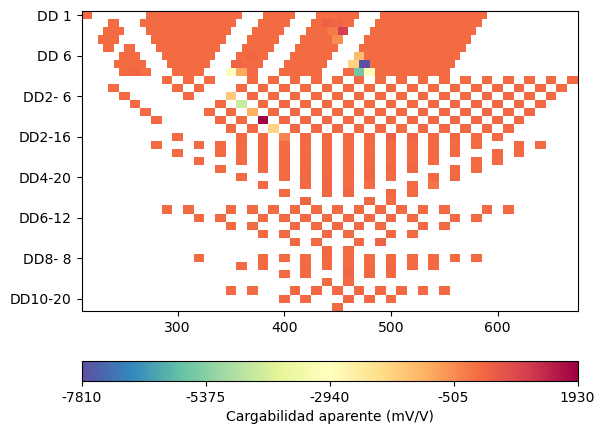

In [3]:
data.show("ip", label = "Cargabilidad aparente (mV/V)")

<Axes: ylabel='Count'>

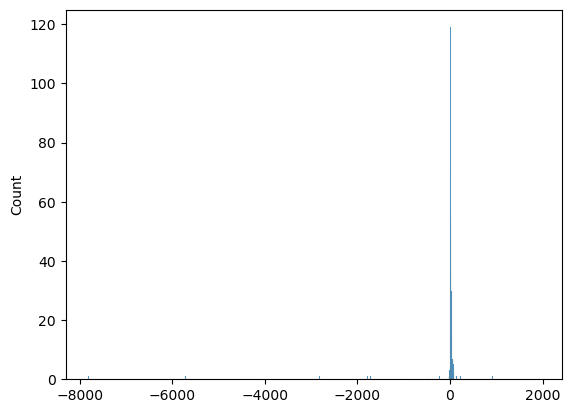

In [4]:
sns.histplot(data["ip"], label= "Cargabilidad aparente (mV/V)")

In [6]:
data.remove(data["ip"] < 0.0)

In [7]:
print(data)

Data: Sensors: 71 data: 482, nonzero entries: ['a', 'b', 'ip', 'm', 'n', 'r', 'valid']


<Axes: ylabel='Count'>

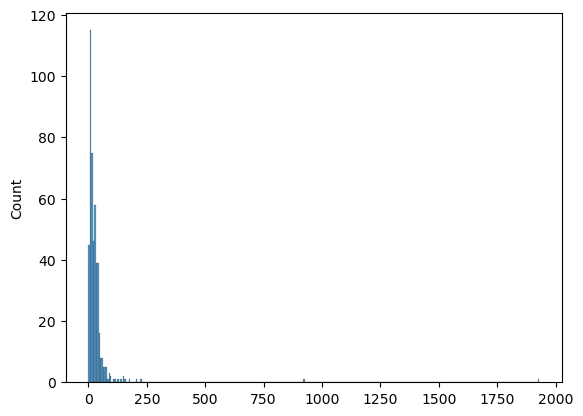

In [8]:
sns.histplot(data["ip"], label= "Cargabilidad aparente (mV/V)")

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x22532b405b0>)

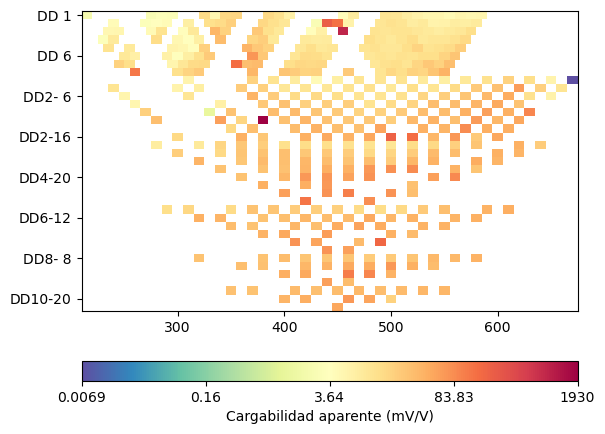

In [17]:
data.show("ip", label = "Cargabilidad aparente (mV/V)")

In [9]:
data["k"] = ert.geometricFactor(data)

In [10]:
data["rhoa"] = data("r") * data("k")

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x2252ec64790>)

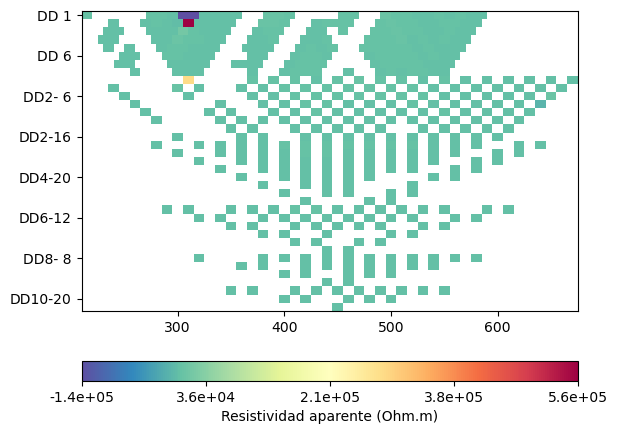

In [11]:
ert.show(data, label="Resistividad aparente (Ohm.m)")

<Axes: ylabel='Count'>

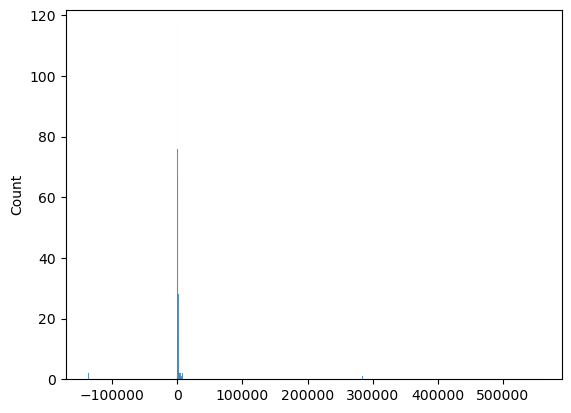

In [12]:
sns.histplot(data["rhoa"], label= "Resistividad aparente (Ohm.m)")

In [13]:
data.remove(data["rhoa"] < 0.0)

In [14]:
print(data)

Data: Sensors: 71 data: 469, nonzero entries: ['a', 'b', 'ip', 'k', 'm', 'n', 'r', 'rhoa', 'valid']


<Axes: ylabel='Count'>

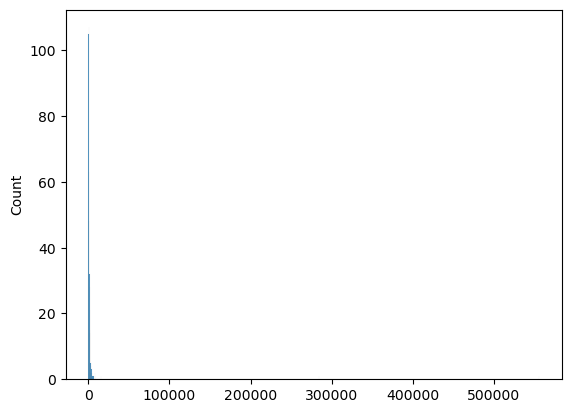

In [15]:
sns.histplot(data["rhoa"], label= "Resistividad aparente (Ohm.m)")

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x22532641b20>)

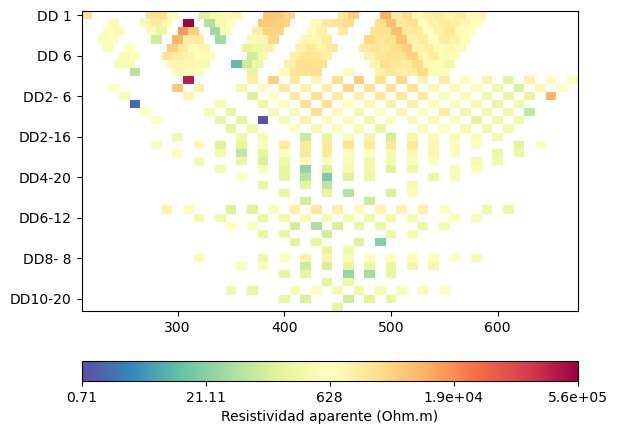

In [16]:
ert.show(data, label="Resistividad aparente (Ohm.m)")

In [21]:
data["err"] = ert.estimateError(data)

In [22]:
data["err"]

469 [0.03000052011419311,...,0.030001816837249905]

In [23]:
mgr1 = ert.ERTIPManager(data)
mgr1.invert(verbose=True)

09/02/24 - 20:36:00 - pyGIMLi - INFO - Found 2 regions.
09/02/24 - 20:36:00 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
09/02/24 - 20:36:00 - pyGIMLi - INFO - Found 2 regions.
09/02/24 - 20:36:00 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
09/02/24 - 20:36:00 - pyGIMLi - INFO - Creating forward mesh from region infos.
09/02/24 - 20:36:00 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
09/02/24 - 20:36:00 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3234 Cells: 6092 Boundaries: 4756
09/02/24 - 20:36:00 - pyGIMLi - INFO - Use median(data values)=637.1149901480102
09/02/24 - 20:36:00 - pyGIMLi - INFO - Created startmodel from forward operator: 1188, min/max=637.114990/637.114990
09/02/24 - 20:36:00 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000225362C8EA0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000225362C8270>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x00000225362C81D0>
min/max (data): 0.71/5.6e+05
min/max (error): 3%/3.14%
min/max (start model): 637/637
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1669.04
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  737.82 (dPhi = 55.43%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  521.43 (dPhi = 28.67%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =  218.41 (dPhi = 54.13%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =  175.77 (dPhi = 18.92%) lam: 20.0
------------

09/02/24 - 20:36:27 - pyGIMLi - INFO - Found 1 regions.
09/02/24 - 20:36:27 - pyGIMLi - INFO - Starting inversion.


chi² =  103.03 (dPhi = 0.67%) lam: 20.0
################################################################################
#                Abort criterion reached: dPhi = 0.67 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ipModelling.DCIPMModelling object at 0x0000022532E51F90>
Data transformation: <pgcore._pygimli_.RTrans object at 0x00000225362CF640>
Model transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000225362C82C0>
min/max (data): 6.9e-06/1.93
min/max (error): 3.05%/1.5e+04%
min/max (start model): 0.02/0.02
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   86.99
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   79.66 (dPhi = 8.33%) lam: 100.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   84.35 (dPhi = -5.93%) lam: 10

(-150.0, 0.0)

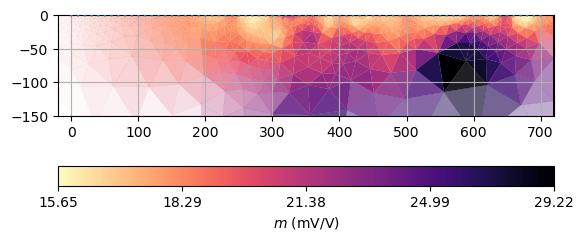

In [32]:
ax, cb = mgr1.showIPModel(ipkw={})
ax.grid(True)
ax.set_ylim([-150, ax.get_ylim()[1]])

(-150.0, 0.0)

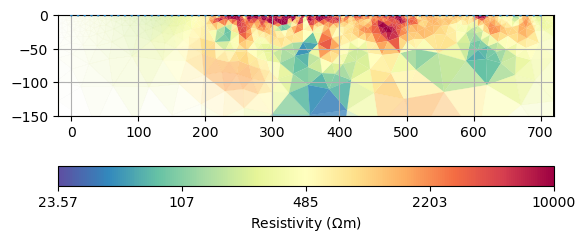

In [34]:
kw = dict(logscale=True, cMax=10000)
ax, cb = mgr1.showResult(**kw)
ax.grid(True)
ax.set_ylim([-150, ax.get_ylim()[1]])

## Refinar inversión

In [35]:
data_array_ip = np.array(data["ip"])

In [36]:
data_series_ip = pd.Series(data_array_ip)

In [38]:
percentile_99_ip = data_series_ip.quantile(0.99)
percentile_99_ip

162.35999999999984

In [41]:
percentile_1_ip = data_series_ip.quantile(0.01)
percentile_1_ip

2.8808

In [39]:
data.remove(data["ip"] > percentile_99_ip)

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x2254be26550>)

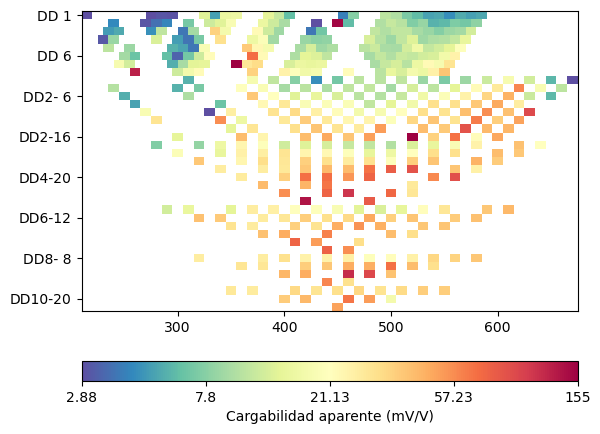

In [42]:
data.show("ip", label = "Cargabilidad aparente (mV/V)", cMin=percentile_1_ip)

<Axes: ylabel='Count'>

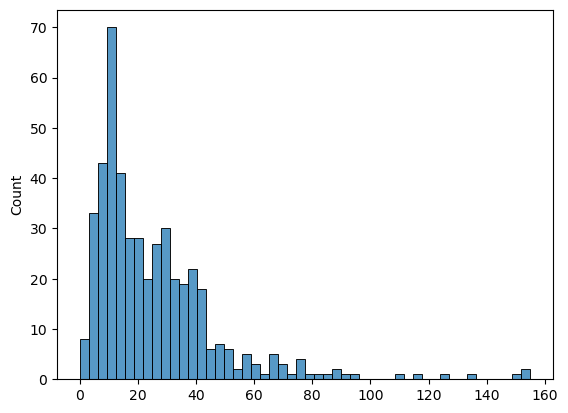

In [46]:
sns.histplot(data["ip"], label= "Cargabilidad aparente (mV/V)", bins=50)

In [47]:
data_array_resistivity = np.array(data["rhoa"])

In [48]:
data_series_resistivity = pd.Series(data_array_resistivity)

In [49]:
quantile_99_resistivity = data_series_resistivity.quantile(0.99)
quantile_1_resistivity = data_series_resistivity.quantile(0.01)

In [50]:
quantile_99_resistivity, quantile_1_resistivity

(7742.266599212845, 31.26387345146418)

In [51]:
data.remove(data["rhoa"] > quantile_99_resistivity)

<Axes: ylabel='Count'>

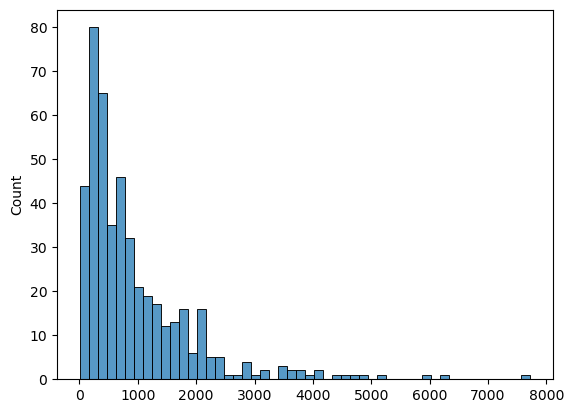

In [52]:
sns.histplot(data["rhoa"], label= "Resistividad aparente (Ohm.m)", bins=50)

In [53]:
mgr1 = ert.ERTIPManager(data)
inv2 = mgr1.invert(verbose=True)

09/02/24 - 20:52:05 - pyGIMLi - INFO - Found 2 regions.
09/02/24 - 20:52:05 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
09/02/24 - 20:52:05 - pyGIMLi - INFO - Found 2 regions.
09/02/24 - 20:52:05 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
09/02/24 - 20:52:05 - pyGIMLi - INFO - Creating forward mesh from region infos.
09/02/24 - 20:52:05 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
09/02/24 - 20:52:05 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3234 Cells: 6092 Boundaries: 4756
09/02/24 - 20:52:05 - pyGIMLi - INFO - Use median(data values)=635.9840167927146
09/02/24 - 20:52:05 - pyGIMLi - INFO - Created startmodel from forward operator: 1188, min/max=635.984017/635.984017
09/02/24 - 20:52:05 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002254C4ADDB0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002254C37A360>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000002254C4ADE00>
min/max (data): 1.34/7728
min/max (error): 3%/3.07%
min/max (start model): 636/636
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1304.74
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  546.55 (dPhi = 57.89%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  215.77 (dPhi = 58.98%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =  171.27 (dPhi = 19.80%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =  164.65 (dPhi = 3.61%) lam: 20.0
----------------

09/02/24 - 20:52:40 - pyGIMLi - INFO - Found 1 regions.
09/02/24 - 20:52:40 - pyGIMLi - INFO - Starting inversion.


chi² =   42.20 (dPhi = -0.90%) lam: 20.0
################################################################################
#                Abort criterion reached: dPhi = -0.9 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ipModelling.DCIPMModelling object at 0x000002254C4B0090>
Data transformation: <pgcore._pygimli_.RTrans object at 0x000002254C49B880>
Model transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002254D69B4A0>
min/max (data): 6.9e-06/0.15
min/max (error): 3.65%/1.5e+04%
min/max (start model): 0.02/0.02
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   78.67
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   28.71 (dPhi = 61.06%) lam: 100.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   28.86 (dPhi = -0.65%) lam: 

(-150.0, 0.0)

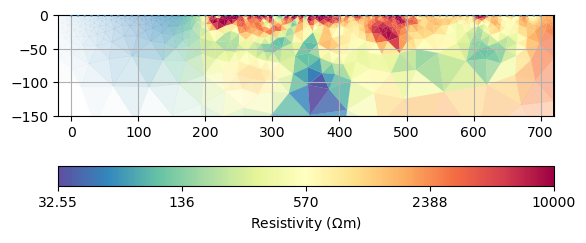

In [65]:
kw = dict(logscale=True, cMax=10000)
ax, cb = mgr1.showResult(**kw)
ax.grid(True)
ax.set_ylim([-150, ax.get_ylim()[1]])

(-150.0, 0.0)

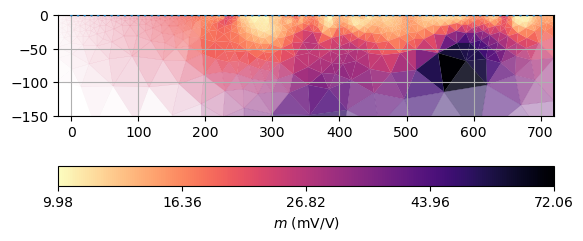

In [55]:
ax, cb = mgr1.showIPModel(ipkw={})
ax.grid(True)
ax.set_ylim([-150, ax.get_ylim()[1]])

array([<Axes: >, <Axes: >], dtype=object)

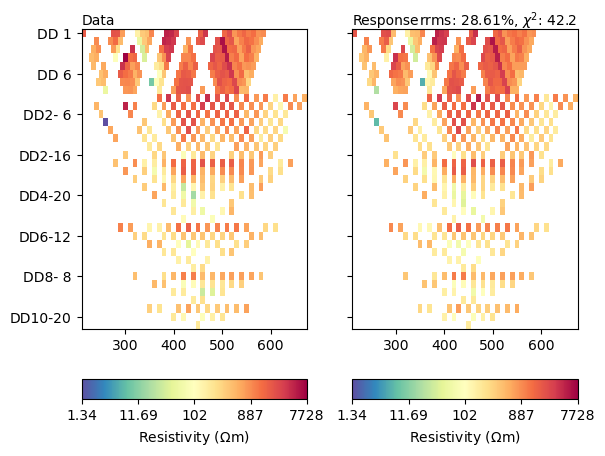

In [67]:
mgr1.showFit()